In [2]:
#import researchpy as rp
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
# set up some example data
fake_data = pd.DataFrame()
n = 40 # measurements per subject
fake_data['subject_id'] = ['remy']*n+['gus']*n+['fievel']*n+['bernard']*n
fake_data['age_group'] = ['old']*n*2+['young']*n*2
fake_data['rates'] = np.random.rand(n*4) # uniform dist
fake_data.loc[fake_data['age_group'] == 'old', 'rates'] = fake_data.loc[fake_data['age_group'] == 'old', 'rates'] +.6

fake_data

,subject_id,age_group,rates
0,remy,old,0.646581
1,remy,old,1.400306
2,remy,old,0.667202
3,remy,old,0.962292
4,remy,old,0.868746
...,...,...,...
155,bernard,young,0.136485
156,bernard,young,0.677439
157,bernard,young,0.745804
158,bernard,young,0.809827


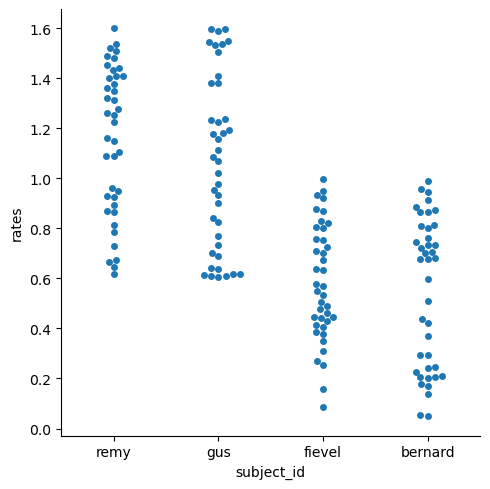

In [4]:
sns.catplot(x="subject_id", y="rates", data=fake_data, kind = "swarm")

In [5]:
#use the lme to measure the effect of age (we know it's there bc we forced it to be)
# construct the model, with fixed effect of age and a random intercept for each subject_id
md = smf.mixedlm("rates ~ age_group", fake_data, groups="subject_id")
mdf = md.fit()
print(mdf.summary())

            Mixed Linear Model Regression Results
Model:                MixedLM   Dependent Variable:   rates   
No. Observations:     160       Method:               REML    
No. Groups:           4         Scale:                0.0868  
Min. group size:      40        Log-Likelihood:       -35.6265
Max. group size:      40        Converged:            Yes     
Mean group size:      40.0                                    
--------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z| [0.025 0.975]
--------------------------------------------------------------
Intercept           1.112    0.035  31.325 0.000  1.042  1.182
age_group[T.young] -0.546    0.050 -10.881 0.000 -0.645 -0.448
subject_id Var      0.000    0.009                            



/home/gl-willow/mambaforge/envs/anna_spyglass_env3/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [12]:
#how to read these results? 
# the coef listed for the intercept (1.112) is the mean of all rates in the first group (old) and the std err is the sem of these rates (.035)
# age group[T.young] coef tells you that the mean of the other group (young) is 0.546 lower than the mean of the main group, and the sem of this group
# the p value listed in the age_group row is highly significant (basically 0) indicating that there is a significant effect of age 


0.035728596478193556

In [79]:
# adding some more columns to explore different categories etc 
fake_data.loc[(fake_data['subject_id'] == 'remy')|(fake_data['subject_id'] == 'fievel'), 'sex'] = 1 
fake_data.loc[fake_data['sex'] != 1, 'sex'] = 0
fake_data['timepoint'] = 1 
for subject in fake_data['subject_id'].unique():
    subj_mean = fake_data.loc[fake_data['subject_id'] == subject, 'rates'].mean() 
    fake_data.loc[(fake_data['subject_id'] == subject) & (fake_data['rates'] > subj_mean), 'timepoint'] = 2

fake_data

,subject_id,age_group,rates,sex,timepoint
0,remy,old,0.740398,1.0,1
1,remy,old,0.949399,1.0,1
2,remy,old,1.526969,1.0,2
3,remy,old,1.136347,1.0,2
4,remy,old,0.615661,1.0,1
...,...,...,...,...,...
155,bernard,young,0.191329,0.0,1
156,bernard,young,0.126495,0.0,1
157,bernard,young,0.515130,0.0,1
158,bernard,young,0.970125,0.0,2


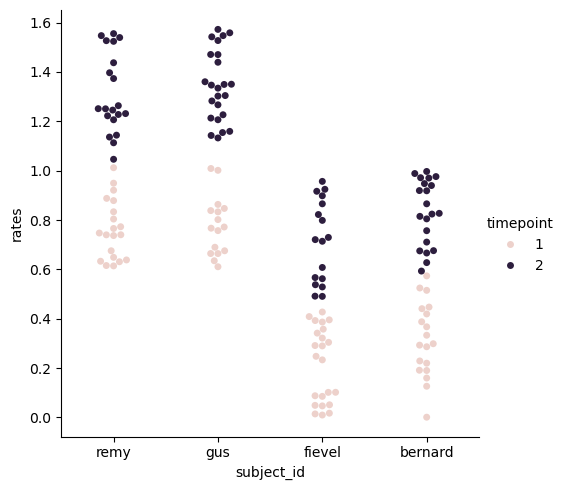

In [82]:
sns.catplot(x="subject_id", y="rates", hue="timepoint", data=fake_data, kind = "swarm")

In [ ]:
# construct our model, with fixed effect of age and a random intercept for each subject_id
md = smf.mixedlm("rates ~ age_group + timepoint", fake_data, groups="subject_id")
# here, timepoint doesn't requires a random slope because it's the same slope for all subjects and also not a continuous variable (so might as well be categorical)

#md = smf.mixedlm("rates ~ age_group + C(sex)", fake_data, groups="subject_id")
mdf = md.fit()
print(mdf.summary())


            Mixed Linear Model Regression Results
Model:                MixedLM   Dependent Variable:   rates  
No. Observations:     160       Method:               REML   
No. Groups:           4         Scale:                0.0206 
Min. group size:      40        Log-Likelihood:       73.8439
Max. group size:      40        Converged:            Yes    
Mean group size:      40.0                                   
-------------------------------------------------------------
                   Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------
Intercept           0.250    0.053  4.758 0.000  0.147  0.353
age_group[T.young] -0.530    0.055 -9.679 0.000 -0.637 -0.423
timepoint           0.534    0.023 23.292 0.000  0.489  0.579
subject_id Var      0.002    0.021                           



/home/gl-willow/mambaforge/envs/anna_spyglass_env3/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


Suggested addition: look into testing for significance as done in Annabelle's paper (Paulson et al) : "An F test using the KenwardRoger method to calculate the denominator degrees of freedom was performed to determine significance."